# Redes Neurais Artificiais 2024.1

## Projeto Prático 2.1: Aprendizado Supervisionado no Neurônio Perceptrons

Equipe:
- Ademir Guimarães da Costa Junior - 2015080075
- Geovani Lopes Sampaio - 2015080033
- Gustavo Pacífico S. S. Chaves - 2015080013
- José Augusto de Almeida Neto - 2015080017

### Bibliotecas

In [135]:
import math
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Parte I – Resolvendo um Problema Linearmente Separável

In [136]:
file_path = '../data/dataAll.txt'

# Carregar os dados do arquivo dataAll.txt
data = np.fromfile(file_path)
print("Dados sem formatação:", data.shape)

# Formatando para x1, x2 e yd
splited_data = np.array(np.split(data, 1000))
print("Dados formatados:", splited_data.shape)

# Amostra de 5 exemplos
print("Amostra de como os dados estão organizados:\n", splited_data[:5])


Dados sem formatação: (3000,)
Dados formatados: (1000, 3)
Amostra de como os dados estão organizados:
 [[-363.7884  244.1423    0.    ]
 [ 328.7572 -256.7658    1.    ]
 [-164.9827  613.2164    0.    ]
 [ 536.5905  764.9575    0.    ]
 [ 314.2297  343.8375    0.    ]]


In [137]:
X = splited_data[:, :2]  # atributos x1 e x2
y = splited_data[:, 2]   # rótulo yd

# Limiar da função de ativação degrau
theta = 0

# Taxa de aprendizado
eta = 0.1

# Função de ativação degrau
def step_function(net_input):
    return 1 if net_input >= theta else 0

# Vetor de pesos 
np.random.seed(90)
w = np.random.uniform(-0.5, 0.5, 3)  # Três pesos, incluindo o bias
print("Vetor inicial de pesos:", w)


Vetor inicial de pesos: [-0.3469458  -0.34231434  0.48549111]


In [138]:
# Adicionar um termo de bias aos dados de entrada (coluna de uns)
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Treinar o perceptron
num_epochs = 0
total_adjustments = 0
converged = False

while not converged: # treinar até a convergência
    num_epochs += 1
    adjustments = 0
    
    for i in range(X.shape[0]):
        net_input = np.dot(X[i], w)
        prediction = step_function(net_input)
        error = y[i] - prediction
        
        if error != 0:
            w += eta * error * X[i] # função delta
            adjustments += 1
            total_adjustments += 1
    
    print(f"Época {num_epochs}:\n{adjustments} ajustes")
    print("-------------------------------------------")
    
    if adjustments == 0:
        converged = True

# Resultados finais
print("Número total de ajustes no vetor de pesos:", total_adjustments)
print("Número de épocas até a convergência:", num_epochs)
print("Vetor final de pesos:", w)

Época 1:
24 ajustes
-------------------------------------------
Época 2:
20 ajustes
-------------------------------------------
Época 3:
11 ajustes
-------------------------------------------
Época 4:
0 ajustes
-------------------------------------------
Número total de ajustes no vetor de pesos: 55
Número de épocas até a convergência: 4
Vetor final de pesos: [ 1.53054199e-01  3.23066716e+02 -3.23025349e+02]


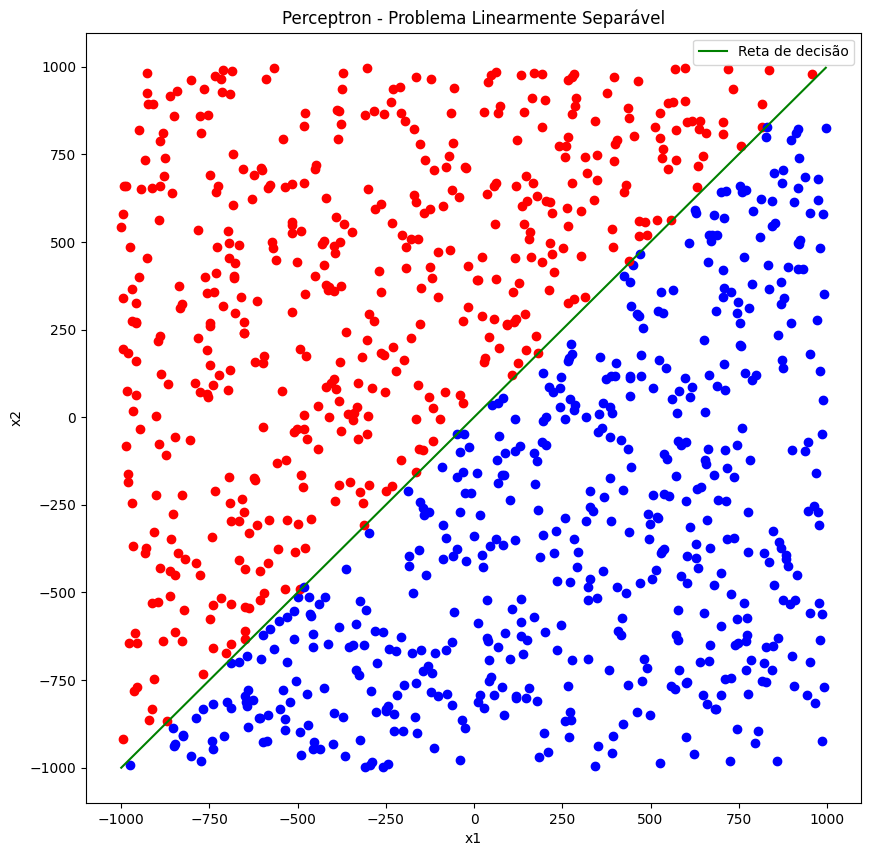

In [139]:
# Plotar os dados e a reta de decisão
plt.figure(figsize=(10, 10))  # Aumentar o tamanho do gráfico

for i in range(X.shape[0]):
    if y[i] == 0:
        plt.scatter(X[i, 1], X[i, 2], color='red')
    else:
        plt.scatter(X[i, 1], X[i, 2], color='blue')

# Plotar a reta de separação
x_values = [min(X[:, 1]), max(X[:, 1])]
y_values = - (w[1] * np.array(x_values) + w[0]) / w[2]
plt.plot(x_values, y_values, label='Reta de decisão', color='green')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptron - Problema Linearmente Separável')
plt.legend()
plt.show()

## Parte II – Experimentação

- Ademir Guimarães da Costa Junior - 2015080075
- Geovani Lopes Sampaio - 2015080033
- Gustavo Pacífico S. S. Chaves - 2015080013
- José Augusto de Almeida Neto - 2015080017

In [140]:
identificador = (5 + 3 + 3 + 7) % 4
file_path = f'../data/data{identificador}.txt'

# Carregar os dados do arquivo com base no valor do identificador
data = np.fromfile(file_path)
print("Dados sem formatação:", data.shape)

Dados sem formatação: (1800,)


## Parte III – Validação Holdout em Problema Não-Linearmente Separável

### Questões

Matriz de confusão das previsões efetuadas para o conjunto de testes;

Qual a acurácia da solução proposta para os dados do conjunto de treinamento inicialmente
fornecido?

Nos mesmos termos da questão anterior, obtenha os valores de precisão, revocação e F-Score.
Para estes cálculos, está liberada a utilização de sklearn.metrics;

A partir destas métricas, discorra acerca da qualidade desta solução perante o conjunto de
testes.

Gráficos com a solução obtida pelo neurônio Perceptron, dados de treinamento e dados de teste.